# Time series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ADF (augmented dickey-fuller test)
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [3]:
#Ljung-Box test
import statsmodels.api as sm

In [4]:
#ARIMA model

from statsmodels.tsa.arima_model import ARIMA

In [5]:
#read the input file 
path ="C:/Users/mayur/Desktop/datascience DELL/data analyst vedios/r language/machine learning/mrf.csv"
stock=pd.read_csv(path)

In [6]:
stock.head()

,Month,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,Jan-06,2780.0,2895.5,2670.0,2811.60,39623,3358,109309329,27061,68.30,225.5,31.60
1,Feb-06,2820.0,3399.0,2800.0,3056.45,77350,8001,242294622,42901,55.46,599.0,236.45
2,Mar-06,3075.0,3287.5,3040.0,3103.20,55500,4988,176800378,39229,70.68,247.5,28.20
3,Apr-06,3160.0,4051.0,3131.0,3456.15,131712,12834,496800616,59934,45.50,920.0,296.15
4,May-06,3550.0,3650.0,2747.0,2789.80,29158,4432,96482558,18375,63.02,903.0,-760.20


In [7]:
#take the column to predict 
mystock  = stock[['Close Price']]
mystock

,Close Price
0,2811.60
1,3056.45
2,3103.20
3,3456.15
4,2789.80
...,...
120,35607.10
121,32429.35
122,38368.50
123,33791.60


In [8]:
#function to check data stationarity
def checkstationarity(data):
    #adfuller() return the following :
    #test statistic,pvalue,lags,total observations
    
    pval = adfuller(data)[1]
    
    if pval> 0.05:
        msg="pvalue = {}. Data not stationary".format(pval)
    else:
        msg="pvalue = {}. Data  stationary".format(pval)
    return(msg)



In [9]:
#check for data stationarity
checkstationarity(mystock)

'pvalue = 0.9574107029213336. Data not stationary'

In [10]:
#since data is not stationary, it has to be stationary by taking difference
diff_mystock = mystock-mystock.shift()

In [11]:
mystock-mystock.shift()

,Close Price
0,NaN
1,244.85
2,46.75
3,352.95
4,-666.35
...,...
120,-4240.50
121,-3177.75
122,5939.15
123,-4576.90


In [12]:
3056.45-2811.6

244.8499999999999

In [13]:

print("Before deleting NA. count =",len(diff_mystock))

Before deleting NA. count = 125


In [14]:
#drop NA from the dataset
diff_mystock.dropna(inplace=True)

In [15]:
print("After deleting NA. count =",len(diff_mystock))

After deleting NA. count = 124


In [16]:
#verify the drop
print(diff_mystock)

     Close Price
1         244.85
2          46.75
3         352.95
4        -666.35
5        -393.95
..           ...
120     -4240.50
121     -3177.75
122      5939.15
123     -4576.90
124       -32.00

[124 rows x 1 columns]


In [17]:
#check for data stationarity
checkstationarity(diff_mystock)

'pvalue = 5.060193512253538e-23. Data  stationary'

In [18]:
#data has now become stationary


Text(0.5, 1.0, 'Differenced Closed Price')

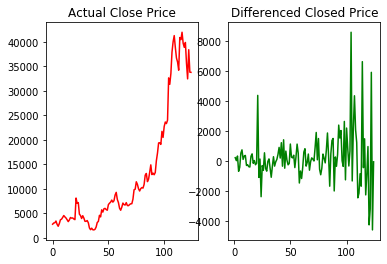

In [19]:
#plot the actual and stationary data
plt.subplot(121)
plt.plot(mystock,color='red')
plt.title("Actual Close Price")

plt.subplot(122)
plt.plot(diff_mystock,color='green')
plt.title('Differenced Closed Price')


Text(0.5, 1.0, 'Differenced Closed Price')

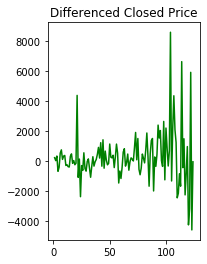

In [20]:
plt.subplot(122)
plt.plot(diff_mystock,color='green')
plt.title('Differenced Closed Price')


C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0, 0.5, 'Correlation')

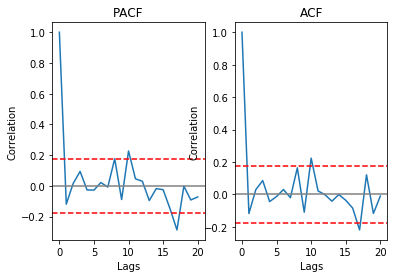

In [21]:
#plot the Correlogram to identify the p and q (lags for AR and MA process)

#get the PACF and ACF lag values 
lags_pacf = pacf(diff_mystock , nlags=20)
lags_acf = acf(diff_mystock , nlags=20)

#PACF  ->to identify p
plt.subplot(121)
plt.plot(lags_pacf)
plt.axhline(y=0,linestyle="-",color='grey')
plt.axhline(y=-1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='red')
plt.title('PACF')
plt.xlabel('Lags')
plt.ylabel('Correlation')

#ACF  -> to identify q
plt.subplot(122)
plt.plot(lags_acf)
plt.axhline(y=0,linestyle="-",color='grey')
plt.axhline(y=-1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='red')
plt.title('ACF')
plt.xlabel('Lags')
plt.ylabel('Correlation')



Text(0, 0.5, 'Correlation')

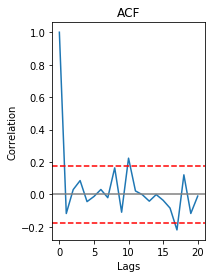

In [22]:
#ACF  -> to identify q
plt.subplot(122)
plt.plot(lags_acf)
plt.axhline(y=0,linestyle="-",color='grey')
plt.axhline(y=-1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(diff_mystock)),linestyle='--',color='red')
plt.title('ACF')
plt.xlabel('Lags')
plt.ylabel('Correlation')



In [23]:
p=0; q=0; d=0

#Build the ARIMA model 
m1= ARIMA(diff_mystock,order=(p,d,q)).fit(disp=0)

C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Close Price   No. Observations:                  124
Model:                     ARMA(0, 0)   Log Likelihood               -1096.589
Method:                           css   S.D. of innovations           1676.599
Date:                Tue, 06 Apr 2021   AIC                           2197.178
Time:                        22:54:20   BIC                           2202.819
Sample:                             0   HQIC                          2199.470
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.5806    150.563      1.658      0.097     -45.517     544.679
==============================================================================
"""

Text(0.5, 1.0, 'ARIMA model residuals')

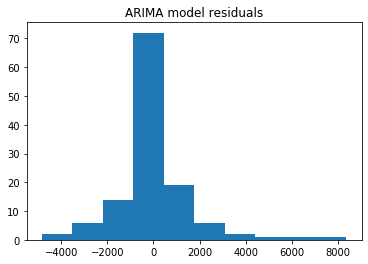

In [25]:
#LJung-Box test to check the model goodness (error should have white noise )
plt.hist(m1.resid)
plt.title('ARIMA model residuals')

In [26]:
#LJung-Box test to check the model goodness
#H0: residuals are independently distributed
#H1: residuals are independently distributed 

pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1]



C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [27]:
if  pvalue > 0.05:
    print("FTR H0: Residuals are independently distributed")
else:
    print("Reject H0: Residuals are not independently distributed")
    

FTR H0: Residuals are independently distributed


In [28]:
#forecast for the next 12 months 
f1=m1.forecast(steps=12)
f1

(array([249.58064516, 249.58064516, 249.58064516, 249.58064516,
        249.58064516, 249.58064516, 249.58064516, 249.58064516,
        249.58064516, 249.58064516, 249.58064516, 249.58064516]),
 array([1676.5990858, 1676.5990858, 1676.5990858, 1676.5990858,
        1676.5990858, 1676.5990858, 1676.5990858, 1676.5990858,
        1676.5990858, 1676.5990858, 1676.5990858, 1676.5990858]),
 array([[-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984],
        [-3036.49317952,  3535.65446984]]))

In [29]:
#the actual forecasted values are the first set of values in the output
forecast = f1[0]
print(forecast)
len(forecast)

[249.58064516 249.58064516 249.58064516 249.58064516 249.58064516
 249.58064516 249.58064516 249.58064516 249.58064516 249.58064516
 249.58064516 249.58064516]


12